In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13768\2114038066.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


In [3]:
data.head(3)

Unique Key            Created Date    Closed Date Agency  \
0    32310363  12/31/2015 11:59:45 PM  01-01-16 0:55   NYPD   
1    32309934  12/31/2015 11:59:44 PM  01-01-16 1:26   NYPD   
2    32309159  12/31/2015 11:59:29 PM  01-01-16 4:51   NYPD   

                       Agency Name           Complaint Type        Descriptor  \
0  New York City Police Department  Noise - Street/Sidewalk  Loud Music/Party   
1  New York City Police Department         Blocked Driveway         No Access   
2  New York City Police Department         Blocked Driveway         No Access   

     Location Type  Incident Zip       Incident Address       Street Name  \
0  Street/Sidewalk       10034.0    71 VERMILYEA AVENUE  VERMILYEA AVENUE   
1  Street/Sidewalk       11105.0        27-07 23 AVENUE         23 AVENUE   
2  Street/Sidewalk       10458.0  2897 VALENTINE AVENUE  VALENTINE AVENUE   

    Cross Street 1   Cross Street 2 Intersection Street 1  \
0   ACADEMY STREET  WEST 204 STREET                   NaN   
1        27 STREET        28 STREET                   NaN   
2  EAST 198 STREET  EAST 199 STREET                   NaN   

  Intersection Street 2 Address Type      City Landmark Facility Type  Status  \
0                   NaN      ADDRESS  NEW YORK      NaN      Precinct  Closed   
1                   NaN      ADDRESS   ASTORIA      NaN      Precinct  Closed   
2                   NaN      ADDRESS     BRONX      NaN      Precinct  Closed   

        Due Date                             Resolution Description  \
0  01-01-16 7:59  The Police Department responded and upon arriv...   
1  01-01-16 7:59  The Police Department responded to the complai...   
2  01-01-16 7:59  The Police Department responded and upon arriv...   

  Resolution Action Updated Date Community Board    Borough  \
0                  01-01-16 0:55    12 MANHATTAN  MANHATTAN   
1                  01-01-16 1:26       01 QUEENS     QUEENS   
2                  01-01-16 4:51        07 BRONX      BRONX   

   X Coordinate (State Plane)  Y Coordinate (State Plane) Park Facility Name  \
0                   1005409.0                    254678.0        Unspecified   
1                   1007766.0                    221986.0        Unspecified   
2                   1015081.0                    256380.0        Unspecified   

  Park Borough  School Name School Number School Region  School Code  \
0    MANHATTAN  Unspecified   Unspecified   Unspecified  Unspecified   
1       QUEENS  Unspecified   Unspecified   Unspecified  Unspecified   
2        BRONX  Unspecified   Unspecified   Unspecified  Unspecified   

  School Phone Number School Address  School City School State   School Zip  \
0         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   
1         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   
2         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   

  School Not Found  School or Citywide Complaint  Vehicle Type  \
0                N                           NaN           NaN   
1                N                           NaN           NaN   
2                N                           NaN           NaN   

   Taxi Company Borough  Taxi Pick Up Location Bridge Highway Name  \
0                   NaN                    NaN                 NaN   
1                   NaN                    NaN                 NaN   
2                   NaN                    NaN                 NaN   

  Bridge Highway Direction Road Ramp Bridge Highway Segment  Garage Lot Name  \
0                      NaN       NaN                    NaN              NaN   
1                      NaN       NaN                    NaN              NaN   
2                      NaN       NaN                    NaN              NaN   

  Ferry Direction Ferry Terminal Name   Latitude  Longitude  \
0             NaN                 NaN  40.865682 -73.923501   
1             NaN                 NaN  40.775945 -73.915094   
2             NaN        

# MISSING VALUE

In [4]:
from datetime import date, time, datetime
data['Created Date'] = data['Created Date'].astype('datetime64[ns]')
data['Closed Date'] = data['Closed Date'].astype('datetime64[ns]')
data["time_diff"] = data['Closed Date'] - data['Created Date']
data["Request_Closing_Time"] = (data["time_diff"].astype('timedelta64[s]'))/(60*60)
data.head(3)

Unique Key        Created Date         Closed Date Agency  \
0    32310363 2015-12-31 23:59:45 2016-01-01 00:55:00   NYPD   
1    32309934 2015-12-31 23:59:44 2016-01-01 01:26:00   NYPD   
2    32309159 2015-12-31 23:59:29 2016-01-01 04:51:00   NYPD   

                       Agency Name           Complaint Type        Descriptor  \
0  New York City Police Department  Noise - Street/Sidewalk  Loud Music/Party   
1  New York City Police Department         Blocked Driveway         No Access   
2  New York City Police Department         Blocked Driveway         No Access   

     Location Type  Incident Zip       Incident Address       Street Name  \
0  Street/Sidewalk       10034.0    71 VERMILYEA AVENUE  VERMILYEA AVENUE   
1  Street/Sidewalk       11105.0        27-07 23 AVENUE         23 AVENUE   
2  Street/Sidewalk       10458.0  2897 VALENTINE AVENUE  VALENTINE AVENUE   

    Cross Street 1   Cross Street 2 Intersection Street 1  \
0   ACADEMY STREET  WEST 204 STREET                   NaN   
1        27 STREET        28 STREET                   NaN   
2  EAST 198 STREET  EAST 199 STREET                   NaN   

  Intersection Street 2 Address Type      City Landmark Facility Type  Status  \
0                   NaN      ADDRESS  NEW YORK      NaN      Precinct  Closed   
1                   NaN      ADDRESS   ASTORIA      NaN      Precinct  Closed   
2                   NaN      ADDRESS     BRONX      NaN      Precinct  Closed   

        Due Date                             Resolution Description  \
0  01-01-16 7:59  The Police Department responded and upon arriv...   
1  01-01-16 7:59  The Police Department responded to the complai...   
2  01-01-16 7:59  The Police Department responded and upon arriv...   

  Resolution Action Updated Date Community Board    Borough  \
0                  01-01-16 0:55    12 MANHATTAN  MANHATTAN   
1                  01-01-16 1:26       01 QUEENS     QUEENS   
2                  01-01-16 4:51        07 BRONX      BRONX   

   X Coordinate (State Plane)  Y Coordinate (State Plane) Park Facility Name  \
0                   1005409.0                    254678.0        Unspecified   
1                   1007766.0                    221986.0        Unspecified   
2                   1015081.0                    256380.0        Unspecified   

  Park Borough  School Name School Number School Region  School Code  \
0    MANHATTAN  Unspecified   Unspecified   Unspecified  Unspecified   
1       QUEENS  Unspecified   Unspecified   Unspecified  Unspecified   
2        BRONX  Unspecified   Unspecified   Unspecified  Unspecified   

  School Phone Number School Address  School City School State   School Zip  \
0         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   
1         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   
2         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   

  School Not Found  School or Citywide Complaint  Vehicle Type  \
0                N                           NaN           NaN   
1                N                           NaN           NaN   
2                N                           NaN           NaN   

   Taxi Company Borough  Taxi Pick Up Location Bridge Highway Name  \
0                   NaN                    NaN                 NaN   
1                   NaN                    NaN                 NaN   
2                   NaN                    NaN                 NaN   

  Bridge Highway Direction Road Ramp Bridge Highway Segment  Garage Lot Name  \
0                      NaN       NaN                    NaN              NaN   
1                      NaN       NaN                    NaN              NaN   
2                      NaN       NaN                    NaN              NaN   

  Ferry Direction Ferry Terminal Name   Latitude  Longitude  \
0             NaN                 NaN  40.865682 -73.923501   
1             NaN                 NaN  40.775945 -73.915094   
2             NaN    

<AxesSubplot: xlabel='Complaint Type'>

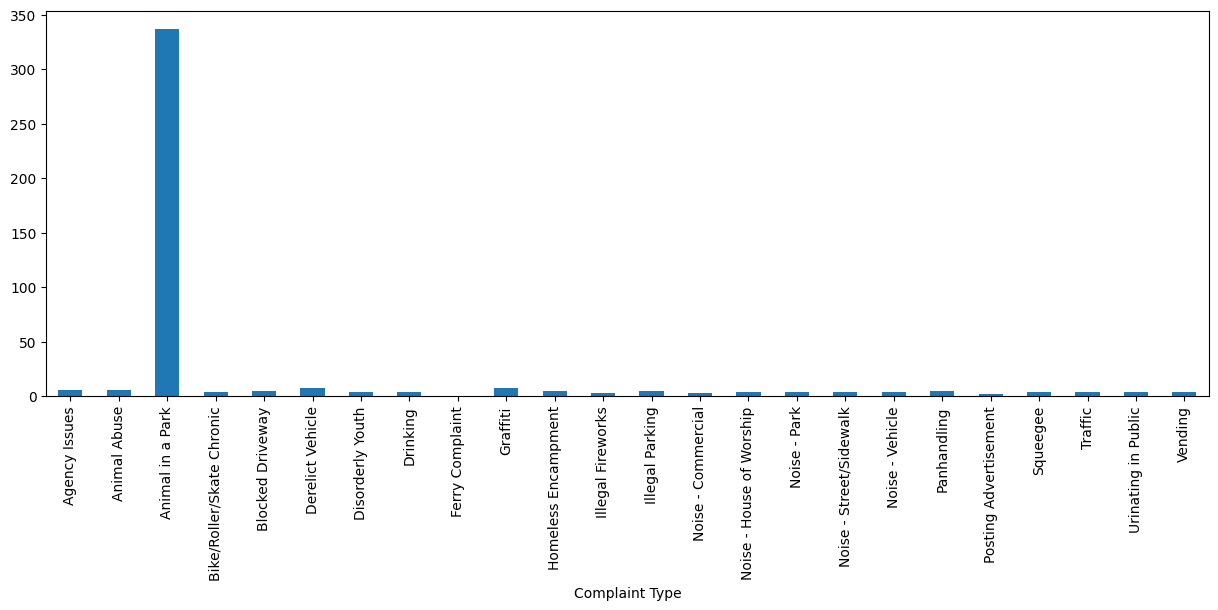

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] =(15,5)
data.groupby("Complaint Type")["Request_Closing_Time"].mean().plot.bar()

In [6]:
# "Animal in park" takes maximum average time close the tickets

<AxesSubplot: xlabel='Complaint Type'>

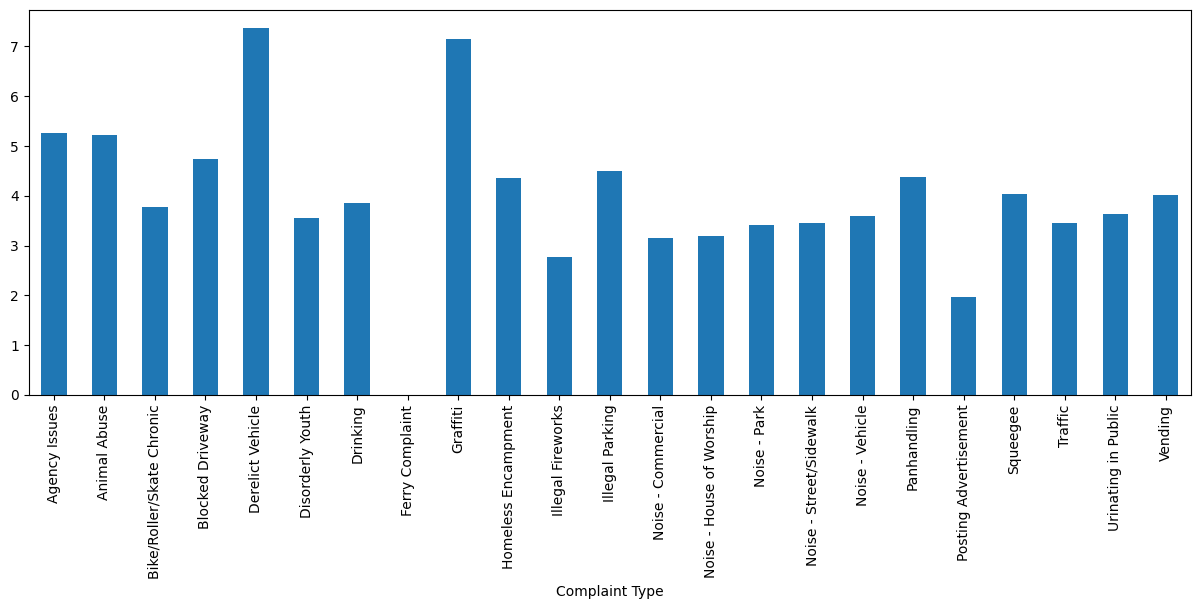

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15, 5)
# Animal in the park seems to be an outlier. Hnece we will remove it
data.loc[data["Complaint Type"] != "Animal in a Park",   ].groupby("Complaint Type")["Request_Closing_Time"].mean().plot.bar()


<AxesSubplot: xlabel='Location Type'>

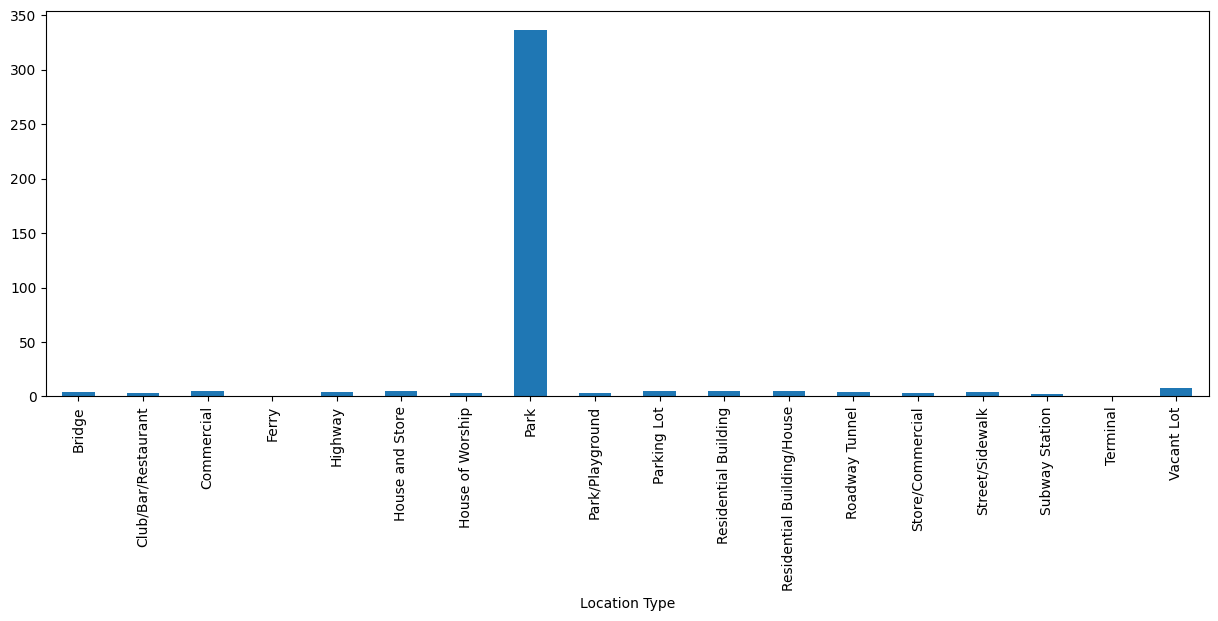

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15, 5)
data.groupby("Location Type")["Request_Closing_Time"].mean().plot.bar()

<AxesSubplot: xlabel='Location Type'>

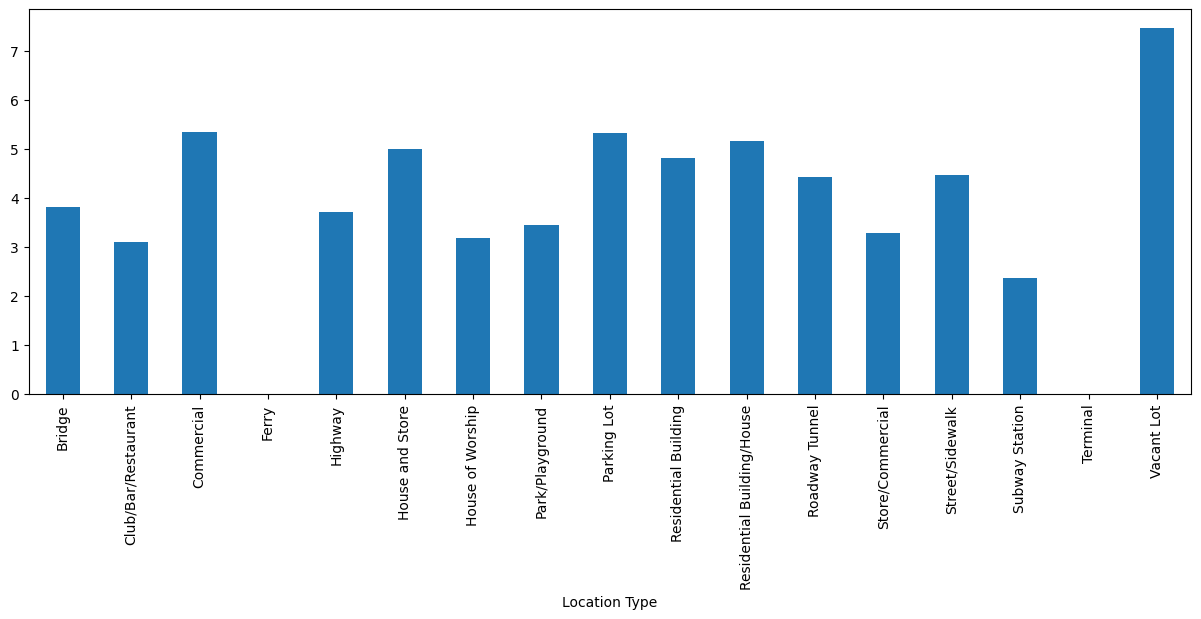

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15, 5)
# park seems to be an outlier so we will remove it 
data.loc[data["Location Type"] != "Park",   ].groupby("Location Type")["Request_Closing_Time"].mean().plot.bar()


In [10]:
# now we see that the vaccant lot takes the maximum time to close the ticket

In [12]:
data.head(3)

Unique Key        Created Date         Closed Date Agency  \
0    32310363 2015-12-31 23:59:45 2016-01-01 00:55:00   NYPD   
1    32309934 2015-12-31 23:59:44 2016-01-01 01:26:00   NYPD   
2    32309159 2015-12-31 23:59:29 2016-01-01 04:51:00   NYPD   

                       Agency Name           Complaint Type        Descriptor  \
0  New York City Police Department  Noise - Street/Sidewalk  Loud Music/Party   
1  New York City Police Department         Blocked Driveway         No Access   
2  New York City Police Department         Blocked Driveway         No Access   

     Location Type  Incident Zip       Incident Address       Street Name  \
0  Street/Sidewalk       10034.0    71 VERMILYEA AVENUE  VERMILYEA AVENUE   
1  Street/Sidewalk       11105.0        27-07 23 AVENUE         23 AVENUE   
2  Street/Sidewalk       10458.0  2897 VALENTINE AVENUE  VALENTINE AVENUE   

    Cross Street 1   Cross Street 2 Intersection Street 1  \
0   ACADEMY STREET  WEST 204 STREET                   NaN   
1        27 STREET        28 STREET                   NaN   
2  EAST 198 STREET  EAST 199 STREET                   NaN   

  Intersection Street 2 Address Type      City Landmark Facility Type  Status  \
0                   NaN      ADDRESS  NEW YORK      NaN      Precinct  Closed   
1                   NaN      ADDRESS   ASTORIA      NaN      Precinct  Closed   
2                   NaN      ADDRESS     BRONX      NaN      Precinct  Closed   

        Due Date                             Resolution Description  \
0  01-01-16 7:59  The Police Department responded and upon arriv...   
1  01-01-16 7:59  The Police Department responded to the complai...   
2  01-01-16 7:59  The Police Department responded and upon arriv...   

  Resolution Action Updated Date Community Board    Borough  \
0                  01-01-16 0:55    12 MANHATTAN  MANHATTAN   
1                  01-01-16 1:26       01 QUEENS     QUEENS   
2                  01-01-16 4:51        07 BRONX      BRONX   

   X Coordinate (State Plane)  Y Coordinate (State Plane) Park Facility Name  \
0                   1005409.0                    254678.0        Unspecified   
1                   1007766.0                    221986.0        Unspecified   
2                   1015081.0                    256380.0        Unspecified   

  Park Borough  School Name School Number School Region  School Code  \
0    MANHATTAN  Unspecified   Unspecified   Unspecified  Unspecified   
1       QUEENS  Unspecified   Unspecified   Unspecified  Unspecified   
2        BRONX  Unspecified   Unspecified   Unspecified  Unspecified   

  School Phone Number School Address  School City School State   School Zip  \
0         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   
1         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   
2         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   

  School Not Found  School or Citywide Complaint  Vehicle Type  \
0                N                           NaN           NaN   
1                N                           NaN           NaN   
2                N                           NaN           NaN   

   Taxi Company Borough  Taxi Pick Up Location Bridge Highway Name  \
0                   NaN                    NaN                 NaN   
1                   NaN                    NaN                 NaN   
2                   NaN                    NaN                 NaN   

  Bridge Highway Direction Road Ramp Bridge Highway Segment  Garage Lot Name  \
0                      NaN       NaN                    NaN              NaN   
1                      NaN       NaN                    NaN              NaN   
2                      NaN       NaN                    NaN              NaN   

  Ferry Direction Ferry Terminal Name   Latitude  Longitude  \
0             NaN                 NaN  40.865682 -73.923501   
1             NaN                 NaN  40.775945 -73.915094   
2             NaN    

In [13]:
# order the complaint types based on the average 'Request_Closing_Time', grouping them for diffrent locations.
a = pd.DataFrame(data.groupby(["Location","Complaint Type"])["Request_Closing_Time"].mean())
a.sort_values("Request_Closing_Time")

Request_Closing_Time
Location                                 Complaint Type                               
(40.678429539269835, -73.98361397723242) Noise - Commercial                   0.043611
(40.76848580086362, -73.91235250532725)  Noise - Vehicle                      0.045278
(40.69371028050496, -73.95499211670034)  Illegal Parking                      0.046389
(40.71598512070559, -73.9509008064274)   Illegal Parking                      0.047500
(40.72895633655987, -74.00074325193769)  Noise - Commercial                   0.050000
...                                                                                ...
(40.73681034405816, -73.93570112335456)  Illegal Parking                           NaN
(40.74285387870548, -73.97913408166315)  Blocked Driveway                          NaN
(40.749256156669986, -74.00919964319513) Noise - Street/Sidewalk                   NaN
(40.77365541162767, -73.95172479233456)  Traffic                                   NaN
(40.80405676738835, -73.95343293482638)  Noise - Street/Sidewalk                   NaN

[151518 rows x 1 columns]

In [16]:
# whether the averagee rspond time is similar or not (overall)
import statsmodels.formula.api as sm
mod = sm.ols(formula= """Request_Closing_Time ~ Q('Complaint Type')""", data=data).fit()
mod.summary()
#Anova Hypothesis
#H0: there is no diffrence among the groups
#H1: at least one group is diffrent than others
# we can see that the p value is lower than alpha, hence we will rejece the null hypothesis and conclude that 
#the at lease 1 group is diffrent.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Request_Closing_Time   R-squared:                       0.037
Model:                              OLS   Adj. R-squared:                  0.036
Method:                   Least Squares   F-statistic:                     514.2
Date:                  Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                          07:45:49   Log-Likelihood:            -9.5737e+05
No. Observations:                298534   AIC:                         1.915e+06
Df Residuals:                    298511   BIC:                         1.915e+06
Df Model:                            22                                         
Covariance Type:              nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            5.2603      2.440      2.156      0.031       0.477      10.043
Q('Complaint Type')[T.Animal Abuse]                 -0.0471      2.441     -0.019      0.985      -4.832       4.738
Q('Complaint Type')[T.Animal in a Park]            331.5744      6.456     51.356      0.000     318.920     344.229
Q('Complaint Type')[T.Bike/Roller/Skate Chronic]    -1.4939      2.458     -0.608      0.543      -6.311       3.323
Q('Complaint Type')[T.Blocked Driveway]             -0.5194      2.440     -0.213      0.831      -5.303       4.264
Q('Complaint Type')[T.Derelict Vehicle]              2.1038      2.441      0.862      0.389      -2.680       6.888
Q('Complaint Type')[T.Disorderly Youth]             -1.7017      2.466     -0.690      0.490      -6.535       3.131
Q('Complaint Type')[T.Drinking]                     -1.3985      2.446     -0.572      0.568      -6.193       3.396
Q('Complaint Type')[T.Ferry Complaint]            2.776e-12   9.28e-14     29.908      0.000    2.59e-12    2.96e-12
Q('Complaint Type')[T.Graffiti]                      1.8909      2.504      0.755      0.450      -3.017       6.799
Q('Complaint Type')[T.Homeless Encampment]          -0.8948      2.442     -0.366      0.714      -5.681       3.891
Q('Complaint Type')[T.Illegal Fireworks]            -2.4992      2.484     -1.006      0.314      -7.367       2.368
Q('Complaint Type')[T.Illegal Parking]              -0.7592      2.440     -0.311      0.756      -5.542       4.024
Q('Complaint Type')[T.Noise - Commercial]           -2.1132      2.441     -0.866      0.387      -6.897       2.670
Q('Complaint Type')[T.Noise - House of Worship]     -2.0670      2.448     -0.844      0.398      -6.865       2.731
Q('Complaint Type')[T.Noise - Park]                 -1.8496      2.442     -0.757      0.449      -6.636       2.937
Q('Complaint Type')[T.Noise - Street/Sidewalk]      -1.8151      2.440     -0.744      0.457      -6.598       2.968
Q('Complaint Type')[T.Noise - Vehicle]              -1.6713      2.441     -0.685      0.493      -6.455       3.112
Q('Complaint Type')[T.Panhandling]                  -0.8876      2.464     -0.360      0.719      -5.717       3.942
Q('Complaint Type')[T.Posting Advertisement]        -3.2845      2.452     -1.340      0.180      -8.090       1.521
Q('Complaint Type')[T.Squeegee]                     -1.2147      3.858     -0.315      0.753      -8.777       6.348
Q('Complaint Type')[T.Traffic]                      -1.8116      2.442     -0.742      0.458      -6.598       2.974
Q('Complaint Type')[T.Urinating in Public]          -1.6337      2.453     -0.666      0.505      -6.441       3.173
Q('Complaint Type')

In [19]:
CrosstabResult = pd.crosstab(index=data['Complaint Type'],columns= data['Location'])
from scipy.stats import chi2_contingency
ChisqResult = chi2_contingency(CrosstabResult)
print('The  P-Value of the ChiSq Test is:',ChisqResult[1])

#H0: there is no relation
#H1: there is a relation
    
# P value is less than 0.05 thereforre we will reject the Null hypothesis and conclude that there is a relation between Complaint and Location

The  P-Value of the ChiSq Test is: 0.0
